In [1]:
import os
os.chdir('..')

In [2]:
import articles as art
import numpy as np
import pickle
import matplotlib.pyplot as plt

# SVM Confidence
This notebook is used the analyze the confidence with which any trained SVM sentiment classifies news articles.

## Step 1. Load the SVM classifier, vectorizer and articles
First, we need to load the SVM we want to analyze, alongside its vectorizer and articles. Note that the SVM classifier has to be trained with the parameter `probability=True` in order to give probability estimates of its classification confidence.

In [7]:
classifier_file = 'pickles/svm_classifier_prob'
classifier = pickle.load( open( classifier_file, "rb" ) )
vectorizer_file = 'pickles/vectorizer_2'
vectorizer = pickle.load( open( vectorizer_file, "rb" ) )

In [8]:
articles = art.load_articles()

## Step 2. Analyze the classification of articles
The code below makes the SVM classify all articles that are provided. Furthermore, the SVM provides the highest class probability per article. Note that this probability and the final classification don't always agree (see sklearn documentation). Therefore, we keep track this disagreement and store only classification confidence if probability and classification agree.

In [12]:
disagreement = 0
confidences = {'-1': [], '0': [], '1': []}

for i, article in enumerate(articles):
    
    # Print progress of loop
    if i % 5000 == 0:
        print(i/len(articles))
        
    # Determine probability and classification
    review_vector = vectorizer.transform([article.body])
    probabilities = classifier.predict_proba(review_vector)
    classification = classifier.predict(review_vector)[0]
    classification_prob = np.argmax(probabilities) - 1
    
    # Check if probability and classification agree. If so, store the probability as classication confidence
    if(int(classification) != classification_prob):
        disagreement += 1
    else:
        confidence = np.max(probabilities)
        confidences[classification].append([confidence, i])
        
        
print("Disagreement between probabilities and classification:", disagreement, "/", len(articles))

0.0
0.14529815180750902
0.29059630361501804
0.435894455422527
0.5811926072300361
0.726490759037545
0.871788910845054
Disagreement between probabilities and classification: 6632 / 34412


## Step 3. Evaluate the confidence levels of the SVM
The section below shows the top 10 most confidently classified articles in each sentiment class and boxplots of the classification confidences of each class.

In [13]:
for classification, classified_articles in confidences.items():
    print("Top 10 most confident classifications in class:", classification)
    top_10 = sorted(classified_articles, key=lambda x: x[0])[-11:]
    article_ids = [article[1] for article in top_10]
    for article_id in article_ids:
        article = articles[article_id]
        print(article)

Top 10 most confident classifications in class: -1
<Article {headline: 'House price rise adds to pressure on Bank to increase rates', date: 8-2006, source: guardian}>
<Article {headline: 'Recession threatens to derail Labour's anti-poverty drive', date: 12-2008, source: guardian}>
<Article {headline: 'MPC ready to counter downturn with rate cut', date: 9-2002, source: guardian}>
<Article {headline: 'Federal Reserve holds interest rates again as US recovery remains fragile', date: 6-2011, source: guardian}>
<Article {headline: 'Week in which global catastrophe was averted', date: 10-2008, source: guardian}>
<Article {headline: 'Inflation pushes UK Misery Index to highest since Black Wednesday', date: 10-2011, source: guardian}>
<Article {headline: 'Unions ask for benefit boost as 5,000 more job cuts announced', date: 11-2008, source: guardian}>
<Article {headline: 'Rising cost of dealing with bad tenants', date: 11-2001, source: guardian}>
<Article {headline: 'The Budget: personal finan

In [14]:
negative_confidences = [confidence[0] for confidence in confidences['-1']]
neutral_confidences = [confidence[0] for confidence in confidences['0']]
positive_confidences = [confidence[0] for confidence in confidences['1']]

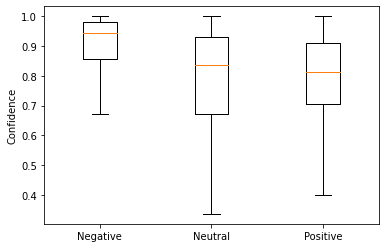

In [15]:
fig, ax = plt.subplots()
ax.boxplot([negative_confidences, neutral_confidences, positive_confidences], showfliers=False)
ax.set_xticklabels(["Negative", "Neutral", "Positive"])
ax.set_ylabel('Confidence')
plt.savefig("SVM_confidence.png")
plt.show()
